## Рубежный контроль №1 «Методы обработки данных»

* Студент — Камалов М. Р.
* Группа — ИУ5-21М
* Вариант — 6
* Номер задачи №1 — 6
* Номер задачи №2 — 26

#### Дополнительные требования для группы ИУ5-21М:
* Для студентов групп ИУ5-21М - для пары произвольных колонок данных построить график "Диаграмма рассеяния"

#### Задача №6:
* Для набора данных проведите устранение пропусков для одного (произвольного) числового признака с использованием метода заполнения средним значением.

#### Задача №26:

* Для набора данных для одного (произвольного) числового признака проведите обнаружение и замену (найденными верхними и нижними границами) выбросов на основе правила трех сигм.


In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
sns.set(style="ticks")

In [10]:
data=pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
data.shape

(16719, 16)

### Задача №6

In [11]:
data.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [12]:
data.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

In [21]:
display(data[["User_Count"]].describe())

,User_Count
count,7590.000000
mean,162.229908
std,561.282326
min,4.000000
25%,10.000000
50%,24.000000
75%,81.000000
max,10665.000000


In [22]:
from sklearn.impute import SimpleImputer

data["User_Count"] = SimpleImputer(strategy = "mean").fit_transform(data[["User_Count"]])

display(data.shape) 
display(data[["User_Count"]].isnull().sum()) 
display(data[["User_Count"]].describe())

(16719, 16)

User_Count    0
dtype: int64

,User_Count
count,16719.000000
mean,162.229908
std,378.165132
min,4.000000
25%,30.000000
50%,162.229908
75%,162.229908
max,10665.000000


### Задача №26

In [27]:
data = data.dropna(axis=0, how='any') 
display(data.shape) 
display(data.columns)

(7877, 16)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [52]:
data["Critic_Score"].head(20)

0     76.0
2     82.0
3     80.0
6     89.0
7     58.0
8     87.0
11    91.0
13    80.0
14    61.0
15    80.0
16    97.0
17    95.0
19    77.0
23    97.0
24    95.0
26    77.0
28    95.0
29    88.0
32    87.0
34    83.0
Name: Critic_Score, dtype: float64

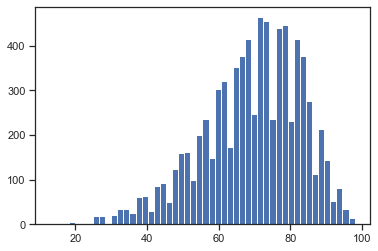

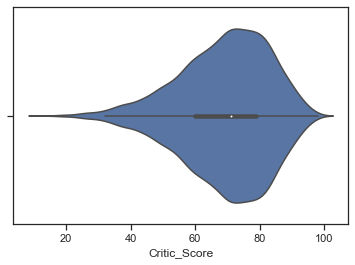

In [51]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.hist(data[["Critic_Score"]], 50) 
plt.show()
sns.violinplot(x=data["Critic_Score"]);

На гистограмме видны выбросы в районе 20 по оси абсцисс

In [56]:
K1 = 3
lower_boundary = data["Critic_Score"].mean() - (K1 * data["Critic_Score"].std())
upper_boundary = data["Critic_Score"].mean() + (K1 * data["Critic_Score"].std())
print(lower_boundary, upper_boundary)

27.234955280847743 110.76783766062744


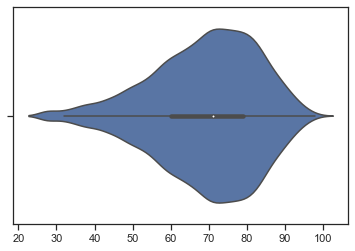

In [57]:
import numpy as np

replaced_bmi = np.where( 
    data["Critic_Score"] > upper_boundary,
    upper_boundary,
    np.where(
        data["Critic_Score"] < lower_boundary,
        lower_boundary,
        data["Critic_Score"],
    ) 
)

sns.violinplot(x = replaced_bmi);

Выбросы заменены

### Диаграмма рассеяния

Text(0, 0.5, 'Critic_Score')

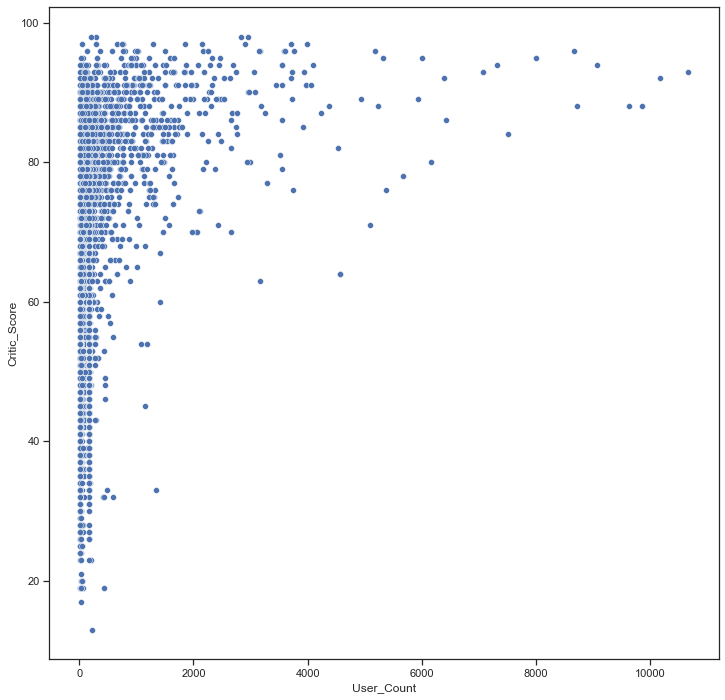

In [65]:
fig, ax = plt.subplots(figsize=(12,12)) 
sns.scatterplot(ax=ax, x='User_Count', y='Critic_Score', data=data)
plt.xlabel('User_Count')
plt.ylabel('Critic_Score')